# Holme-Kim Graphs

In [1]:
from __future__ import print_function, division

%matplotlib inline
%precision 3

import warnings
warnings.filterwarnings('ignore')

import random
import networkx as nx
import numpy as np
import scipy.stats as stats

import thinkplot
from thinkstats2 import Pmf, Cdf
import thinkcomplexity

In [2]:
def generate_nodes(G):
    """ Generates all the nodes in G """
    for node in G:
        yield node

def sample_nodes(G, n=1000):
    """ Generates n random nodes """
    nodes = G.nodes()
    for i in range(n):
        node = np.random.choice(nodes)
        yield node
        
def compare_node_degree(G):
    """ 
    Plots the distribution of degrees for all the nodes 
    (from generate_nodes) and for a random sampling of 
    nodes (from sample_nodes)
    """
    # enumerate all the nodes
    node_degree = [G.degree(node) for node in generate_nodes(G)]
    thinkplot.Cdf(Cdf(node_degree), label='generate_nodes')

    # generate a random sample of nodes
    node_degree_sample = [G.degree(node) for node in sample_nodes(G)]
    thinkplot.Cdf(Cdf(node_degree_sample), label='sample_nodes')
    
    thinkplot.Config(xlabel='degree', ylabel='CDF', xscale='log')     

In [3]:
def generate_friends(G):
    """
    Generates all friends by iterating through all nodes and
    yielding each of their friends in succession
    """
    for node in G:
        for friend in G[node]:
            yield friend
            
def sample_friends(G, n=1000):
    """
    Generates n random friends by picking a random node then
    randomly picking one of their friends
    """
    nodes = G.nodes()
    for _ in range(n):
        node = np.random.choice(nodes)
        friends = G.neighbors(node)
        friend = np.random.choice(friends)
        yield friend
        
def sample_edges(G, n=1000):
    """
    Generates n random friends by randomly choosing an edge
    and randomly picking a node on either side
    """
    edges = G.edges()
    for _ in range(n):
        # NOTE: you can't use np.random.choice to choose
        # from edges, because it treats a list of pairs
        # as an array with two columns
        edge = random.choice(edges)
        yield random.choice(edge)
        
def compare_friend_degree(G):
    """
    Plots the degrees of all nodes vs. the degrees of all friends
    vs. the degrees of the sampling of friends by node vs. the
    degrees of the sampling of friends by edges.
    """
    
    # enumerate the nodes
    node_degree = [G.degree(node) for node in generate_nodes(G)]
    thinkplot.Cdf(Cdf(node_degree), color='gray')
    
    # enumerate the friends
    friend_degree = [G.degree(node) for node in generate_friends(G)]
    thinkplot.Cdf(Cdf(friend_degree), label='generate_friends')

    # sample friends
    friend_degree_sample = [G.degree(node) for node in sample_friends(G)]
    thinkplot.Cdf(Cdf(friend_degree_sample), color='green', label='sample_friends')
    
    # sample edges
    edge_degree_sample = [G.degree(node) for node in sample_edges(G)]
    thinkplot.Cdf(Cdf(edge_degree_sample), color='red', label='sample_edges')
    
    thinkplot.Config(xlabel='degree', ylabel='CDF', xscale='log')

In [ ]:
hk1 = nx.powerlaw_cluster_graph(20000, 200, 0.1)
print("hk1")
hk2 = nx.powerlaw_cluster_graph(20000, 200, 0.4)
print("hk2")
hk3 = nx.powerlaw_cluster_graph(20000, 200, 0.7)
print("hk3")
hk4 = nx.powerlaw_cluster_graph(20000, 200, 1.0)
print("hk4")

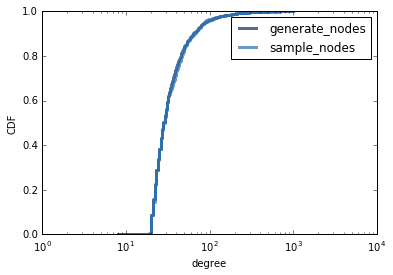

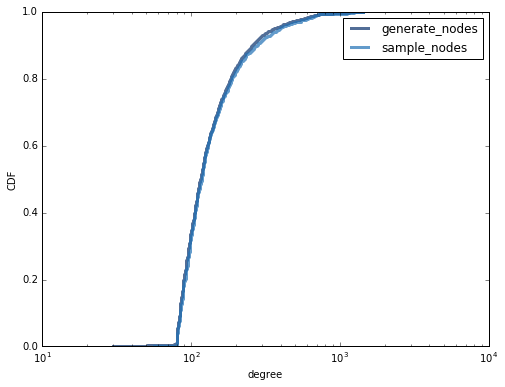

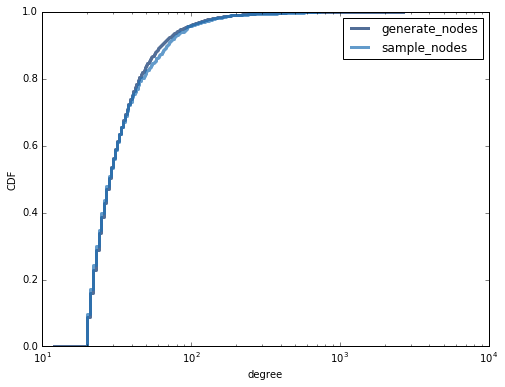

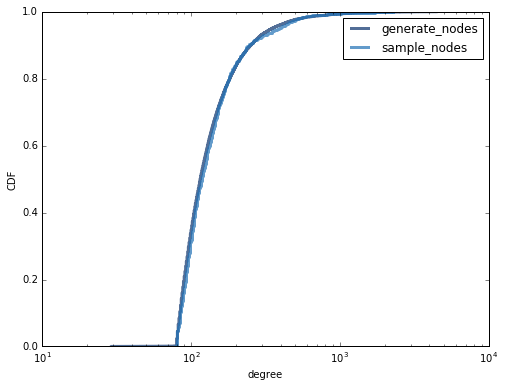

In [7]:
compare_node_degree(hk1)
thinkplot.Figure()
compare_node_degree(hk2)
thinkplot.Figure()
compare_node_degree(hk3)
thinkplot.Figure()
compare_node_degree(hk4)


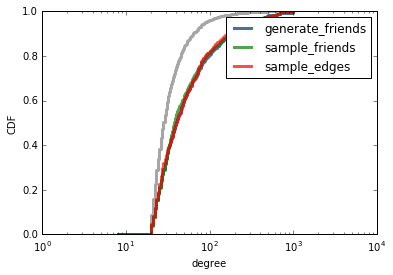

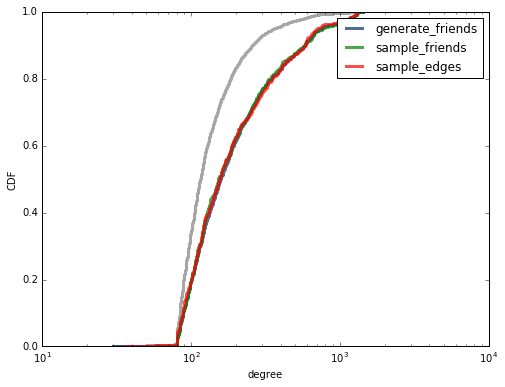

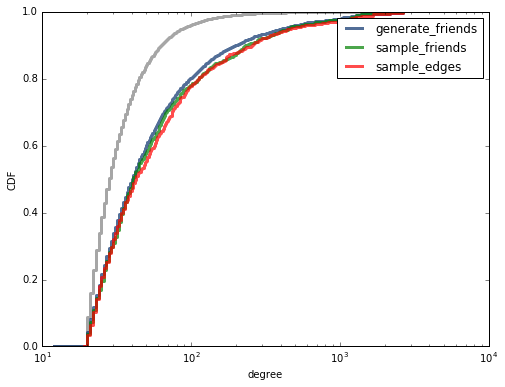

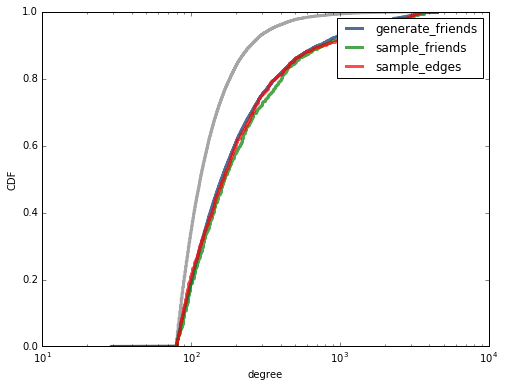

In [8]:
compare_friend_degree(hk1)
thinkplot.Figure()
compare_friend_degree(hk2)
thinkplot.Figure()
compare_friend_degree(hk3)
thinkplot.Figure()
compare_friend_degree(hk4)


In [10]:
def degeneracy(G):
    max_degree = max([len(G[node]) for node in generate_nodes(G)])
    return max_degree

print("| {:15s} | {:15s} | {:15s} | {:15s} | {:15s} |"
      .format("Network", "Number of Nodes", "Number of Edges", "Cluster. Coef.", "Degeneracy"))
print("| {:15s} | {:15s} | {:15s} | {:15s} | {:15s} |"
      .format("---", "---", "---", "---", "---"))
print("| {:15s} | {:15d} | {:15d} | {:15f} | {:15f} |"
      .format("HK 1", len(hk1.nodes()), len(hk1.edges()), thinkcomplexity.clustering_coefficient(hk1), degeneracy(hk1)))
print("| {:15s} | {:15d} | {:15d} | {:15f} | {:15f} |"
      .format("HK 2", len(hk2.nodes()), len(hk2.edges()), thinkcomplexity.clustering_coefficient(hk2), degeneracy(hk2)))
print("| {:15s} | {:15d} | {:15d} | {:15f} | {:15f} |"
      .format("HK 3", len(hk3.nodes()), len(hk3.edges()), thinkcomplexity.clustering_coefficient(hk3), degeneracy(hk3)))
print("| {:15s} | {:15d} | {:15d} | {:15f} | {:15f} |"
      .format("HK 4", len(hk4.nodes()), len(hk4.edges()), thinkcomplexity.clustering_coefficient(hk4), degeneracy(hk4)))


| Network         | Number of Nodes | Number of Edges | Cluster. Coef.  | Degeneracy      |
| ---             | ---             | ---             | ---             | ---             |
| HK 1            |            4000 |           79395 |        0.107453 |     1005.000000 |
| HK 2            |            4000 |          311241 |        0.116305 |     1429.000000 |
| HK 3            |           20000 |          399319 |        0.082737 |     2644.000000 |
| HK 4            |           20000 |         1589450 |        0.048606 |     4526.000000 |
